In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense  , Input
from tensorflow.keras import Model
from tensorflow.nn import relu
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

print("Version of tensorflow is : ",tf.__version__)

In [5]:
df = pd.read_csv('housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
mean = df.mean()
print(mean)
df = df - mean

RM              6.240288
LSTAT          12.939632
PTRATIO        18.516564
MEDV       454342.944785
dtype: float64


In [7]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,0.334712,-7.959632,-3.216564,49657.055215
1,0.180712,-3.799632,-0.716564,-742.944785
2,0.944712,-8.909632,-0.716564,274357.055215
3,0.757712,-9.999632,0.183436,247057.055215
4,0.906712,-7.609632,0.183436,305857.055215


In [8]:
std = df.std()
print(std)
df = df / std

RM              0.643650
LSTAT           7.081990
PTRATIO         2.111268
MEDV       165340.277653
dtype: float64


In [9]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,0.520021,-1.123926,-1.523523,0.300332
1,0.280761,-0.536520,-0.339400,-0.004493
2,1.467742,-1.258069,-0.339400,1.659348
3,1.177211,-1.411981,0.086884,1.494234
4,1.408703,-1.074505,0.086884,1.849864


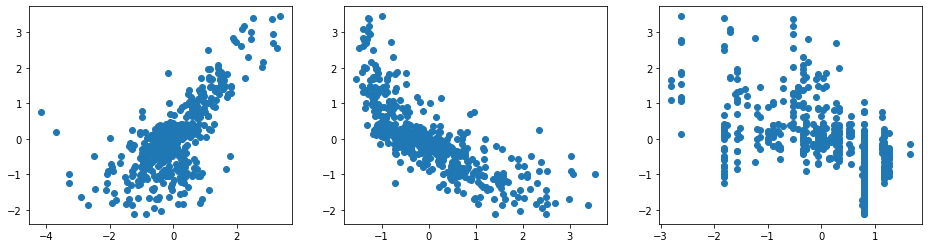

In [15]:
f , ax = plt.subplots(1,3,figsize=(16,4))
ax[0].plot(df.RM.values , df.MEDV.values,'o')
ax[1].plot(df.LSTAT.values , df.MEDV.values,'o')
ax[2].plot(df.PTRATIO.values , df.MEDV.values,'o')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV' , axis=1), df['MEDV'], test_size=0.2, random_state=42)

In [19]:
train_x = X_train.values
train_y = y_train.values

test_x  = X_test.values
test_y  = y_test.values

In [63]:
def plot_his(his):
    plt.figure(figsize=(20,8))
    plt.plot(his.history['loss'] , label = "train_mse")
    plt.plot(his.history['val_loss'] , label = "test_mse")
    plt.legend()
    plt.title("MSE")

In [40]:
def create_model(input_shape , layers , optimizer = 'adam'):
    input = Input(shape=input_shape)
    x = input
    for layer in layers:
        x = Dense(layer)(x)
    model = Model(inputs = input , outputs = x)
    model.compile(optimizer = optimizer , loss = MeanSquaredError() , metrics=['mae'])
    return model

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
13/13 [==============================] - 0s 928us/step - loss: 0.2909 - mae: 0.4001


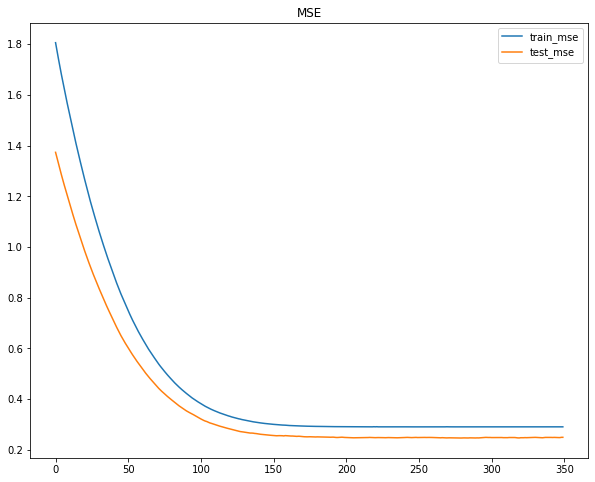

In [51]:
model1 = create_model((train_x.shape[1] , ) , layers=[1])
model1.summary()

his1 = model1.fit(train_x , train_y , epochs=350 , verbose=0 , validation_data=(test_x , test_y))
eva1_train = model1.evaluate(test_x , test_y)
eva1_test  = model1.evaluate(train_x , train_y)
plot_his(his1)

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
FOR TEST  DATA 
4/4 [==============================] - 0s 2ms/step - loss: 0.2449 - mae: 0.3837
FOR TRAIN DATA 
13/13 [==============================] - 0s 1ms/step - loss: 0.2914 - mae: 0.4012


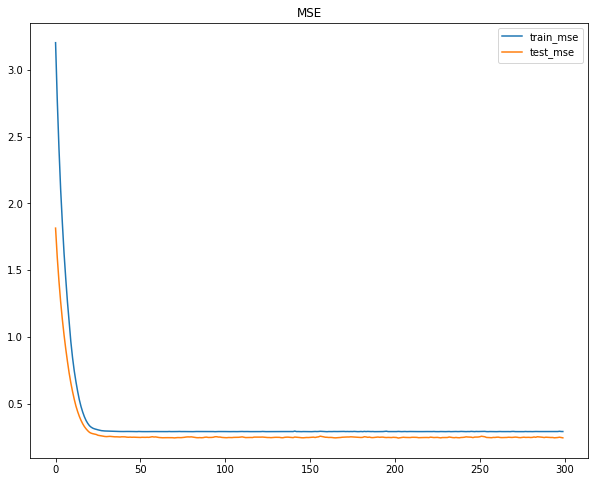

In [52]:
model2 = create_model((train_x.shape[1] , ) , layers=[4,4,1])
model2.summary()

his2 = model2.fit(train_x , train_y , epochs=300 , verbose=0 , validation_data=(test_x , test_y))
print("FOR TEST  DATA \n=========================================")
eva2 = model2.evaluate(test_x , test_y)
print("FOR TRAIN DATA \n=========================================")
eva2_train  = model2.evaluate(train_x , train_y)
plot_his(his2)

Try **Polynomial Reg** to improve model prediction or accurecy

columns = ['RM','LSTAT' , 'PTRATIO' ,	'MEDV' , 'LSTAT_deg2' ]

In [58]:
mod_df = df[df.columns]
mod_df['LSTAT_deg2'] = df['LSTAT'] ** 2
mod_df.head()

,RM,LSTAT,PTRATIO,MEDV,LSTAT_deg2
0,0.520021,-1.123926,-1.523523,0.300332,1.263209
1,0.280761,-0.536520,-0.339400,-0.004493,0.287854
2,1.467742,-1.258069,-0.339400,1.659348,1.582738
3,1.177211,-1.411981,0.086884,1.494234,1.993689
4,1.408703,-1.074505,0.086884,1.849864,1.154561


In [59]:
X_train, X_test, y_train, y_test = train_test_split(mod_df.drop('MEDV' , axis=1), mod_df['MEDV'], test_size=0.2, random_state=42)

train_x = X_train.values
train_y = y_train.values

test_x  = X_test.values
test_y  = y_test.values

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
FOR TEST  DATA 
4/4 [==============================] - 0s 1ms/step - loss: 0.2250 - mae: 0.3710
FOR TRAIN DATA 
13/13 [==============================] - 0s 925us/step - loss: 0.2474 - mae: 0.3818


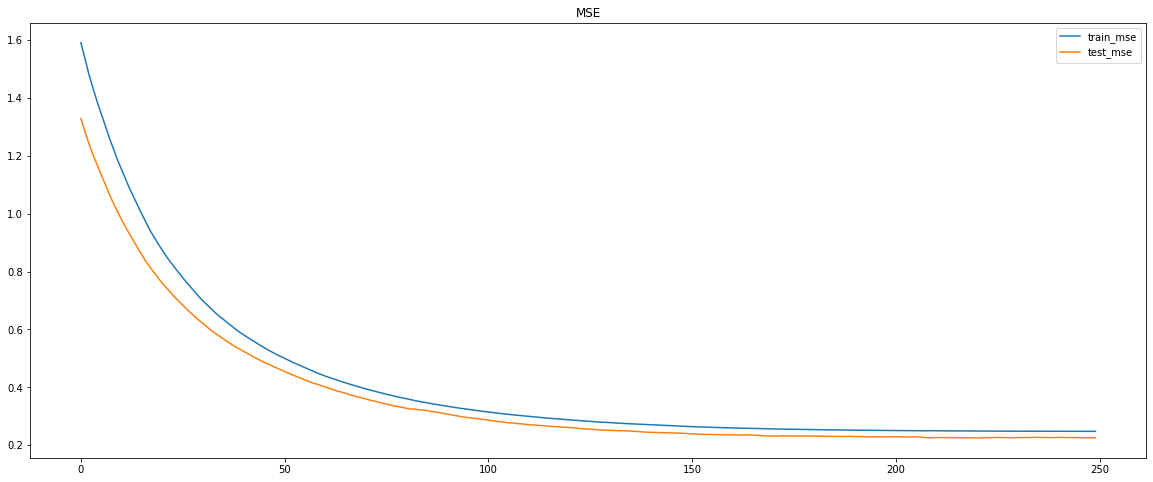

In [64]:
model_pol_1 = create_model((train_x.shape[1] , ) , layers=[1])
model_pol_1.summary()

his_pol_1 = model_pol_1.fit(train_x , train_y , epochs=250 , verbose=0 , validation_data=(test_x , test_y))
print("FOR TEST  DATA \n=========================================")
eva_pol_2 = model_pol_1.evaluate(test_x , test_y)
print("FOR TRAIN DATA \n=========================================")
eva_pol_2_train  = model_pol_1.evaluate(train_x , train_y)
plot_his(his_pol_1)

         RM     LSTAT   PTRATIO      MEDV  LSTAT_deg2   RM_deg2
0  0.520021 -1.123926 -1.523523  0.300332    1.263209  0.270422
1  0.280761 -0.536520 -0.339400 -0.004493    0.287854  0.078827
2  1.467742 -1.258069 -0.339400  1.659348    1.582738  2.154266
3  1.177211 -1.411981  0.086884  1.494234    1.993689  1.385826
4  1.408703 -1.074505  0.086884  1.849864    1.154561  1.984445
Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
FOR TEST  DATA 
4/4 [==============================] - 0s 2ms/step - loss: 0.1743 - mae: 0.3241
FOR TRAIN DATA 
13/13 [==================

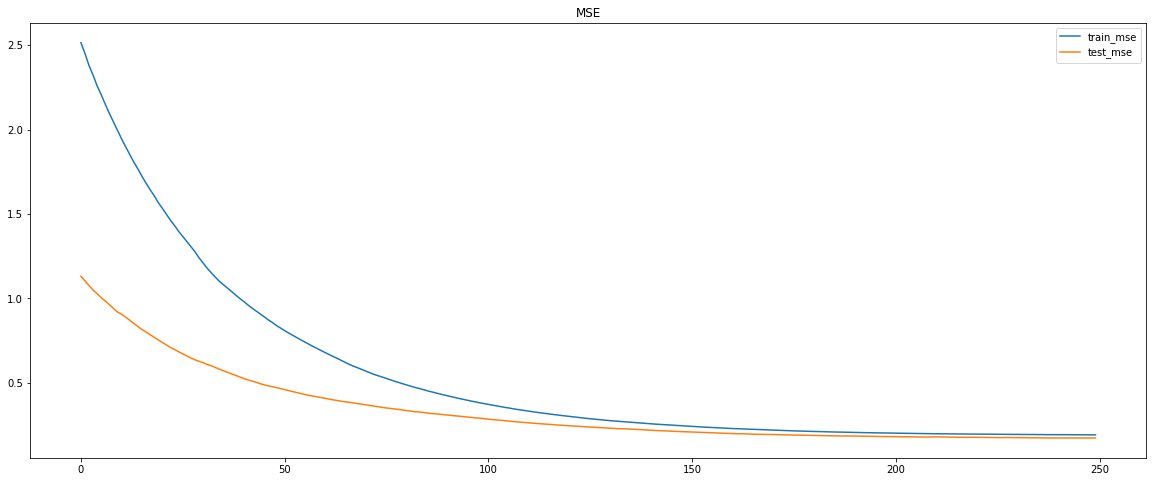

In [81]:
mod_df = df[df.columns]
mod_df['LSTAT_deg2'] = df['LSTAT'] ** 2
mod_df['RM_deg2'] = df['RM'] ** 2
print(mod_df.head())

###############################################################################

X_train, X_test, y_train, y_test = train_test_split(mod_df.drop('MEDV' , axis=1), mod_df['MEDV'], test_size=0.2, random_state=42)

train_x = X_train.values
train_y = y_train.values

test_x  = X_test.values
test_y  = y_test.values

###############################################################################

model_pol_2 = create_model((train_x.shape[1] , ) , layers=[1])
model_pol_2.summary()

his_pol_2 = model_pol_2.fit(train_x , train_y , epochs=250 , verbose=0 , validation_data=(test_x , test_y))
print("FOR TEST  DATA \n=========================================")
eva_pol_2 = model_pol_2.evaluate(test_x , test_y)
print("FOR TRAIN DATA \n=========================================")
eva_pol_2_train  = model_pol_2.evaluate(train_x , train_y)
plot_his(his_pol_2)

In [83]:
model_pol_2.variables

[<tf.Variable 'dense_22/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.33087274],
        [-0.5153836 ],
        [-0.20448957],
        [ 0.05374723],
        [ 0.12868227]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32, numpy=array([-0.17502731], dtype=float32)>]

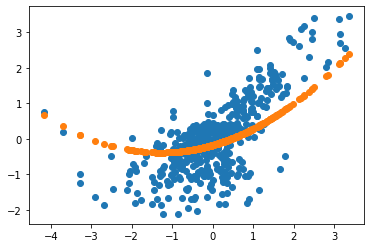

In [87]:
# RM v/s Price
plt.plot(df.RM.values , df.MEDV.values,'o')
plt.plot(df['RM'] , ((mod_df['RM_deg2'] * 0.12868227)+(mod_df['RM'] * 0.33087274) + (-0.17502731)).values , 'o')

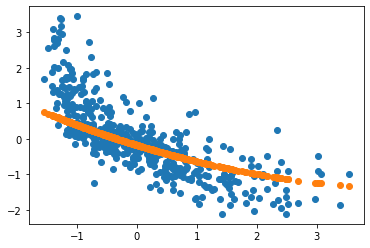

In [88]:
#LSTAT  v.s Price
# RM v/s Price
plt.plot(df.LSTAT.values , df.MEDV.values,'o')
plt.plot(df['LSTAT'] , ((mod_df['LSTAT_deg2'] * 0.05374723)+(mod_df['LSTAT'] * -0.5153836 ) + (-0.17502731)).values , 'o')

         RM     LSTAT      MEDV  LSTAT_deg2   RM_deg2
0  0.520021 -1.123926  0.300332    1.263209  0.270422
1  0.280761 -0.536520 -0.004493    0.287854  0.078827
2  1.467742 -1.258069  1.659348    1.582738  2.154266
3  1.177211 -1.411981  1.494234    1.993689  1.385826
4  1.408703 -1.074505  1.849864    1.154561  1.984445
Model: "functional_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
FOR TEST  DATA 
4/4 [==============================] - 0s 2ms/step - loss: 0.2099 - mae: 0.3681
FOR TRAIN DATA 
13/13 [==============================] - 0s 866us/step - loss: 0.2239 - mae: 0.3675


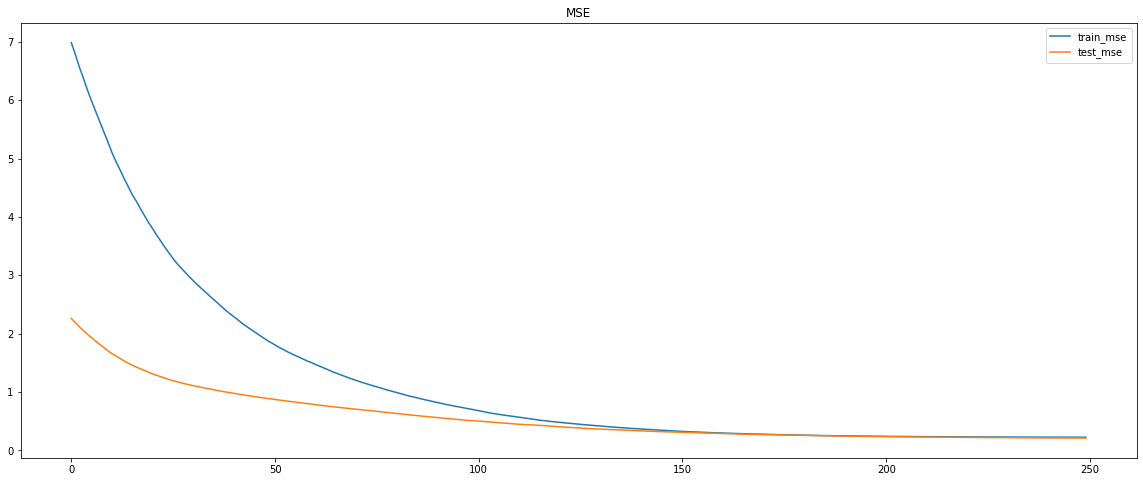

In [97]:
mod_df = df[df.columns]
mod_df.drop('PTRATIO' , axis=1 , inplace=True)
mod_df['LSTAT_deg2'] = df['LSTAT'] ** 2
mod_df['RM_deg2'] = df['RM'] ** 2
print(mod_df.head())

###############################################################################

X_train, X_test, y_train, y_test = train_test_split(mod_df.drop('MEDV' , axis=1), mod_df['MEDV'], test_size=0.2, random_state=42)

train_x = X_train.values
train_y = y_train.values

test_x  = X_test.values
test_y  = y_test.values

###############################################################################

model_pol_3 = create_model((train_x.shape[1] , ) , layers=[1])
model_pol_3.summary()

his_pol_3 = model_pol_3.fit(train_x , train_y , epochs=250 , verbose=0 , validation_data=(test_x , test_y))
print("FOR TEST  DATA \n=========================================")
eva_pol_3 = model_pol_3.evaluate(test_x , test_y)
print("FOR TRAIN DATA \n=========================================")
eva_pol_3_train  = model_pol_3.evaluate(train_x , train_y)
plot_his(his_pol_3)

**Final Model**

Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
FOR TEST  DATA 
4/4 [==============================] - 0s 2ms/step - loss: 0.1741 - mae: 0.3240
FOR TRAIN DATA 
13/13 [==============================] - 0s 885us/step - loss: 0.1920 - mae: 0.3339


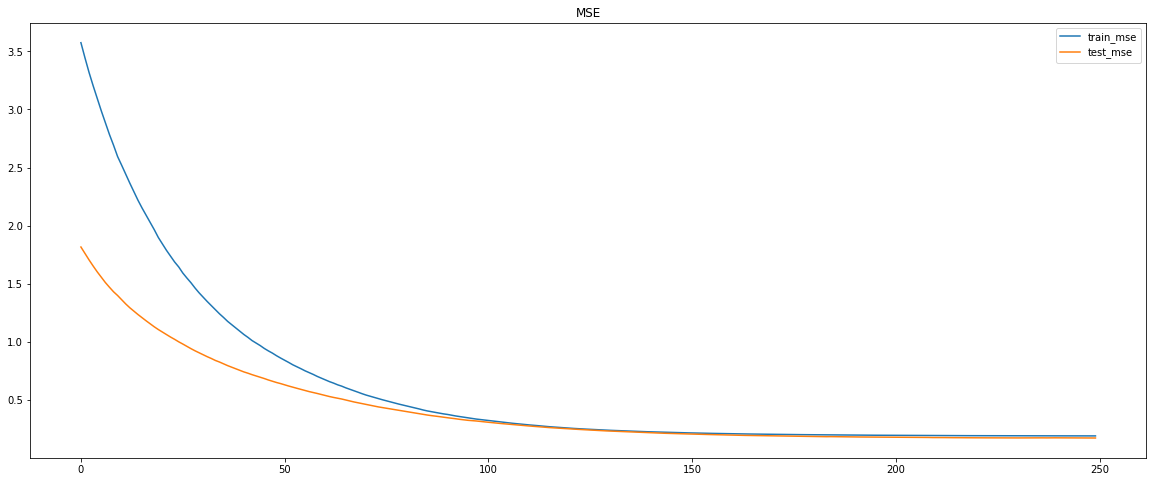

In [105]:
mod_df = df[df.columns]
mod_df['LSTAT_deg2'] = df['LSTAT'] ** 2
mod_df['RM_deg2'] = df['RM'] ** 2
#print(mod_df.head())

###############################################################################

X_train, X_test, y_train, y_test = train_test_split(mod_df.drop('MEDV' , axis=1), mod_df['MEDV'], test_size=0.2, random_state=42)

train_x = X_train.values
train_y = y_train.values

test_x  = X_test.values
test_y  = y_test.values

###############################################################################

model_pol_2 = create_model((train_x.shape[1] , ) , layers=[1])
model_pol_2.summary()

his_pol_2 = model_pol_2.fit(train_x , train_y , epochs=250 , verbose=0 , validation_data=(test_x , test_y))
print("FOR TEST  DATA \n=========================================")
eva_pol_2 = model_pol_2.evaluate(test_x , test_y)
print("FOR TRAIN DATA \n=========================================")
eva_pol_2_train  = model_pol_2.evaluate(train_x , train_y)
plot_his(his_pol_2)

In [106]:
final_model = model_pol_2

In [107]:
print("Test_x : ",test_x[:5])
print("Test_y : ",test_y[:5])

Test_x :  [[-0.48829093  0.73289686  0.79735779  0.53713781  0.23842804]
 [ 0.23104437 -0.46874283 -0.00784572  0.21971984  0.0533815 ]
 [ 0.64431261  0.67641556  0.79735779  0.45753801  0.41513874]
 [-1.2837546   1.55752386  0.74999287  2.42588059  1.64802587]
 [ 0.33979917  1.5589359   0.79735779  2.43028113  0.11546348]]
Test_y :  [-0.32202041  0.2876314  -0.81736251 -1.85885103 -1.24919921]


In [109]:
pred_y = final_model.predict(test_x[:5])
print(pred_y)

[[-0.8306257 ]
 [ 0.16572365]
 [-0.4137814 ]
 [-1.2261083 ]
 [-0.8984944 ]]


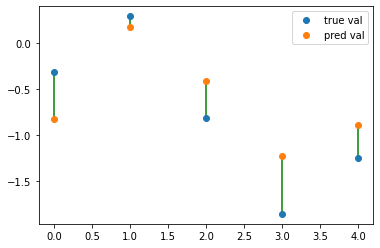

In [115]:
for i in range(5):
    plt.plot([i , i],[test_y[i] , pred_y[i]] , 'g')
plt.plot(test_y[:5],'o',label="true val")
plt.plot(pred_y , 'o' , label="pred val")
plt.legend()

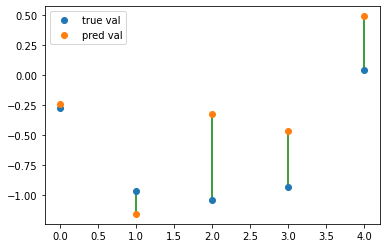

In [117]:
pred_y = final_model.predict(train_x[:5])

for i in range(5):
    plt.plot([i , i],[train_y[i] , pred_y[i]] , 'g')
plt.plot(train_y[:5],'o',label="true val")
plt.plot(pred_y , 'o' , label="pred val")
plt.legend()